#TSP using Genetic algorithm

<b>Problem definition</b>:<br>
  There are 'n' cities and cost to travel from city i->j is given. There is sales man who want cover all the cities. So devise a route such that the cost is as low as possible.<br>
<u>Constraint</u> : Every cities must be visted only once.

<b>Solution</b>:<br>
  This is a optimization problem. In this solution we use genetic algorithm to find the optimal path. Genetic is a non-derivative approach to solve a optimization problem. Though its not guaranteed to find the most low cost path, it can provide a path with optimal cost(soft computing). This is usually employeed to solve NP problems.

<u>Following are the steps to take:</u><br>
Finding relation between phenotypes and genotypes for this problem,i.e encoding and decoding.<br>
Finding the appropriate fitness function.<br>
Generating intial population.<br>
Finding suitable selection, crossover and mutation method.<br>
Choosing appropriate survivor selection method and termination condition.<br>


<b>IN THIS NOTEBOOK</b><br>
Encoding         : Permutation Encoding <br>
Fitness function : Cost<br>
Selection        : Roulette Wheel Selection<br>
Crossover        : Ordered Crossover<br>
Mutation         : Interchange

In [0]:
#The libraries used in this problem
import numpy as np
import copy
from random import shuffle
from random import randrange
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [0]:
#Defining city graph
n=10 #No of cities
cities=[i for i in range(n)]
graph=np.random.randint(1,100,(n,n))#graph[i][j] tells the cost to travel i->j
for i in range(n):
  graph[i][i]=0
print(graph)

[[ 0 83 39 21 99 33  2 64 10 77]
 [17  0 99  6 22 67 53 41 54 88]
 [50 80  0  6 68 79 35  3 99 64]
 [25 97 61  0 99 78 44 17 47 28]
 [ 6 29 20 96  0 34 46 11 62 62]
 [66 92 45 57 67  0 29 44 36 29]
 [91 49  2  1 88 59  0 32 71 30]
 [39 38 15 57 56 79 70  0 15 30]
 [84 86 65 50 85 34 90 30  0 53]
 [70 99 91 37 39 81 76 61 18  0]]


In [0]:
#Defining chromosome
class chromosome:
  def __init__(self,data,fit):
    self.data=np.asarray(data)
    self.fit=fit

In [0]:
#Defining fitness function
def fitness(data):
  cost=0
  for i in range(len(data)-1):
    cost+=graph[data[i]][data[i+1]]
  return cost #Fitness value

In [0]:
#Roulette Wheel Selection
def selection(population,fitness_data,noc):
  total=sum(fitness_data)
  inverse=list(map(lambda x:total-x,fitness_data))
  total=sum(inverse)
  probability=list(map(lambda x:x/total,inverse))
  parents=np.random.choice(population,(noc,2),False,p=probability) #Gives noc pairs of identical parents from population, selected with given probability
  return parents

In [0]:
#Ordered crossover
def crossover(parents):
  children=np.full((parents.shape[0],2,n),n)
  for i,j in enumerate(parents):
    low=randrange(n)
    high=randrange(low,n)  
    children[i][0][low:high]=j[0].data[low:high]
    children[i][1][low:high]=j[1].data[low:high]
    pointer_list=[x for x in range(n) if x not in range(low,high)]
    for l in [0,1]:
      ptr=0
      array=np.concatenate((j[l].data[:low],j[l].data[high:]))
      for k in array:
        if k not in children[i][1-l][:]:
          children[i][1-l][pointer_list[ptr]]=k
          ptr+=1
      for m in j[l].data[low:high]:
        if m not in children[i][1-l][:]:
          children[i][1-l][pointer_list[ptr]]=m
          ptr+=1
  return children.reshape(-1,n)

In [0]:
#Interchange mutation
def mutation(children,nom):
  main_index=np.random.randint(0,children.shape[0],nom)
  for j in range(main_index):
    indices=np.random.randint(0,n,2)
    children[j][indices[0]],children[j][indices[1]]=children[j][indices[1]],children[j][indices[0]]
  return children

In [0]:
#Max fit survives
def survivor_selection(population,fitness_data_parent,children):
  fitness_data_children=list(map(lambda x:fitness(x),children))
  children_chormosome=[]
  for i,j in enumerate(children.tolist()):
    children_chormosome.append(chromosome(j,fitness_data_children[i]))
  all_combine=population+children_chormosome
  all_fitness_combine=fitness_data_parent+fitness_data_children
  for i in range(len(all_combine)-len(population)):
    index=all_fitness_combine.index(max(all_fitness_combine))
    del all_fitness_combine[index],all_combine[index]
  return all_combine,all_fitness_combine

In [0]:
def train_setup(population_count=10,no_gen=10,noc=3,nom=1,verbose=True):
  #Initial poupulation
  population=[]
  fitness_data=[]
  for i in range(population_count):
    shuffle(cities)
    data=copy.deepcopy(cities)
    fitness_data.append(fitness(data))
    population.append(chromosome(data,fitness_data[-1]))
  
  #Evolution process
  overall_best_fit=min(fitness_data)
  best_chromosome=population[fitness_data.index(overall_best_fit)]
  avg_fitness=[sum(fitness_data)/len(fitness_data)]
  min_fitness=[overall_best_fit]
  max_fitness=[max(fitness_data)]
  #try:
  for i in range(no_gen):
    parents=selection(population,fitness_data,noc)
    children=crossover(parents)
    mutated=mutation(children,nom)
    population,fitness_data=survivor_selection(population,fitness_data,mutated)
    
    #Recording
    current_generation_best=min(fitness_data)
    average=sum(fitness_data)/len(fitness_data)
    max_fitness.append(max(fitness_data))
    min_fitness.append(current_generation_best)
    avg_fitness.append(average)
    if current_generation_best<overall_best_fit:
      overall_best_fit=current_generation_best
      best_chromosome=population[fitness_data.index(current_generation_best)]
    
    #Details of evolution
    if verbose:
      clear_output(wait=True)
      print("Generation : ",i+1)
      print("Overall best fit : ",overall_best_fit)
      print("Current best fit : ",current_generation_best)
      print("Current avg : ",average)
      plt.plot(min_fitness,'g',label="MIN")
      plt.plot(avg_fitness,'b',label="AVG")
      plt.plot(max_fitness,'r',label="MAX")
      plt.xlabel("Generation")
      plt.ylabel("Fitness")
      plt.legend(loc="best")
      plt.show()
  #except Exception as e:
    #print(e)
  return population,best_chromosome

Generation :  100
Overall best fit :  296
Current best fit :  296
Current avg :  296.0


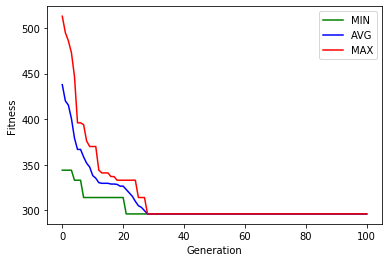

CPU times: user 18.6 s, sys: 321 ms, total: 19 s
Wall time: 18.9 s


In [0]:
%%time
"""
Parameters : pop_count=10,no_gen=50,cp=0.3,mp=0.1
noc:1 [int(0.3*10/2)]
nom:0 [int(2*0.1*1)]
Comments:
It has less population count as well childrens arent mutated,
so best fit was saturated after few generations.
"""
final1=train_setup(population_count=10,no_gen=100,cp=0.3,mp=0.1)

Generation :  100
Overall best fit :  150
Current best fit :  150
Current avg :  150.0


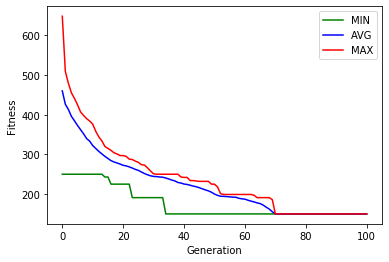

CPU times: user 18.4 s, sys: 240 ms, total: 18.6 s
Wall time: 18.6 s


In [0]:
%%time
"""
Parameters : pop_count=100,no_gen=100,cp=0.3,mp=0.1
noc:15 [int(0.3*100/2)]
nom:3 [int(2*0.1*15)]
Comments:
It has more population and 30 parents are crossovered in each generation,
3/30 of children are mutated, so the saturation was only towards the end.
Best fit was better than previous one
"""
final2=train_setup(population_count=100,no_gen=100,cp=0.3,mp=0.1)

Generation :  100
Overall best fit :  179
Current best fit :  179
Current avg :  190.05


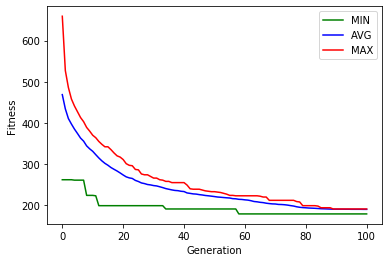

CPU times: user 18.3 s, sys: 324 ms, total: 18.7 s
Wall time: 18.7 s


In [0]:
%%time
"""
Parameters : pop_count=100,no_gen=100,cp=0.3,mp=0.5
noc:15 [int(0.3*100/2)]
nom:15 [int(2*0.5*15)]
Comments:
Sample population and cp as above, but half of the produced child are mutated
So convergence is low and saturation is not present
"""
final3=train_setup(population_count=100,no_gen=100,cp=0.3,mp=0.5)

Generation :  100
Overall best fit :  137
Current best fit :  137
Current avg :  137.0


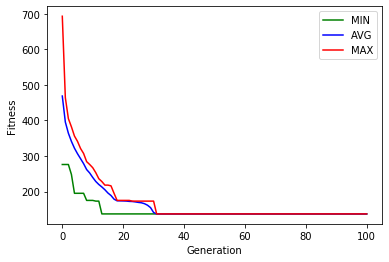

CPU times: user 19.2 s, sys: 256 ms, total: 19.4 s
Wall time: 19.4 s


In [0]:
%%time
"""
Parameters : pop_count=100,no_gen=100,cp=1,mp=0.1
noc:50 [int(1*100/2)]
nom:10 [int(2*0.1*50)]
Comments:
Same population(100), but cp=1 so every parents are present in crossover and
10/100 are mutated, its low so evolution got converged in first few generation.
This got the most optimal best fit
"""
final4=train_setup(population_count=100,no_gen=100,cp=1,mp=0.1)

In [0]:
#Algorithm way to solve TSP //source : https://www.geeksforgeeks.org/traveling-salesman-problem-tsp-implementation/
from sys import maxsize 
V = n
def travellingSalesmanProblem(graph, s):   
    # store all vertex apart from source vertex 
    vertex = [] 
    for i in range(V): 
        if i != s: 
            vertex.append(i) 
    # store minimum weight Hamiltonian Cycle 
    min_path = maxsize 
    while True: 
        # store current Path weight(cost) 
        current_pathweight = 0
        # compute current path weight 
        k = s 
        for i in range(len(vertex)): 
            current_pathweight += graph[k][vertex[i]] 
            k = vertex[i] 
        #current_pathweight += graph[k][s] 
        #update minimum 
        min_path = min(min_path, current_pathweight) 
        if not next_permutation(vertex): 
            break
    return min_path 
  
# next_permutation implementation 
def next_permutation(L): 
    n = len(L) 
    i = n - 2
    while i >= 0 and L[i] >= L[i + 1]: 
        i -= 1
    if i == -1: 
        return False
    j = i + 1
    while j < n and L[j] > L[i]: 
        j += 1
    j -= 1
    L[i], L[j] = L[j], L[i] 
    left = i + 1
    right = n - 1
    while left < right: 
        L[left], L[right] = L[right], L[left] 
        left += 1
        right -= 1
    return True

In [0]:
%%time
all_=[]
for i in cities:
  all_.append(travellingSalesmanProblem(graph,i))
print(min(all_))

133
CPU times: user 19.7 s, sys: 2.42 ms, total: 19.7 s
Wall time: 19.7 s
